In [1]:
%matplotlib inline
from pycocotools.coco import COCO
from pycocoevalcap.eval import COCOEvalCap
import matplotlib.pyplot as plt
import skimage.io as io
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
import os

import json
from json import encoder
encoder.FLOAT_REPR = lambda o: format(o, '.3f')

In [5]:
# set up file names and pathes
data_dir = '.'
data_type = 'train2017'
ann_file = '%s/annotations/captions_%s.json'%(data_dir, data_type)
resFile = '%s/model_predictions_topics_80.json'%(data_dir)

# download Stanford models
!./get_stanford_models.sh

Found Stanford CoreNLP.


In [3]:
# fix for MSCOCO 2017 dataset
with open(ann_file, 'r') as f:
    data = json.load(f)
    data['type'] = 'captions'
    
with open(ann_file, 'w') as f:
    json.dump(data, f)

In [6]:
# create coco object and cocoRes object
coco = COCO(ann_file)
cocoRes = coco.loadRes(resFile)

loading annotations into memory...
0:00:02.143601
creating index...
index created!
Loading and preparing results...     
DONE (t=0.13s)
creating index...
index created!


In [7]:
# create cocoEval object by taking coco and cocoRes
cocoEval = COCOEvalCap(coco, cocoRes)

# evaluate on a subset of images by setting
# cocoEval.params['image_id'] = cocoRes.getImgIds()
# please remove this line when evaluating the full validation set
cocoEval.params['image_id'] = cocoRes.getImgIds()

# evaluate results
# SPICE will take a few minutes the first time, but speeds up due to caching
cocoEval.evaluate()

tokenization...
setting up scorers...
computing Bleu score...
{'reflen': 48469, 'guess': [49319, 44319, 39319, 34319], 'testlen': 49319, 'correct': [33017, 16121, 7087, 3175]}
ratio: 1.0175369824
Bleu_1: 0.669
Bleu_2: 0.493
Bleu_3: 0.353
Bleu_4: 0.252
computing METEOR score...
METEOR: 0.232
computing Rouge score...
ROUGE_L: 0.498
computing CIDEr score...
CIDEr: 0.822
computing SPICE score...
SPICE: 0.159


In [8]:
# print output evaluation scores
for metric, score in cocoEval.eval.items():
    print '%s: %.3f'%(metric, score)

CIDEr: 0.822
Bleu_4: 0.252
Bleu_3: 0.353
Bleu_2: 0.493
Bleu_1: 0.669
ROUGE_L: 0.498
METEOR: 0.232
SPICE: 0.159


ground truth captions
two laptops and a computer monior sit next to each other on a desk 
A couple of laptops on a wooden desk.
A busy desk with three computers running simultaneously.
two laptops and a monitor all lit up on a messy desk with an open journal
Desktop and laptop computers and other office supplies on a desk.


generated caption (CIDEr score 0.6)
a desk with a laptop and a monitor


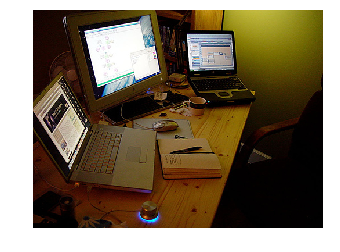

In [10]:
# demo how to use evalImgs to retrieve low score result
idx = 128
evals = [eva for eva in cocoEval.evalImgs if eva['CIDEr']<30]
print 'ground truth captions'
imgId = evals[idx]['image_id']
annIds = coco.getAnnIds(imgIds=imgId)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

print '\n'
print 'generated caption (CIDEr score %0.1f)'%(evals[idx]['CIDEr'])
annIds = cocoRes.getAnnIds(imgIds=imgId)
anns = cocoRes.loadAnns(annIds)
coco.showAnns(anns)

img = coco.loadImgs(imgId)[0]
I = io.imread(str('%s/%s/%s'%('../dataset', data_type, img['file_name'])))
plt.imshow(I)
plt.axis('off')
plt.show()

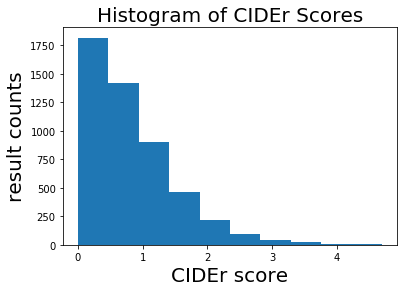

In [11]:
# plot score histogram
ciderScores = [eva['CIDEr'] for eva in cocoEval.evalImgs]
plt.hist(ciderScores)
plt.title('Histogram of CIDEr Scores', fontsize=20)
plt.xlabel('CIDEr score', fontsize=20)
plt.ylabel('result counts', fontsize=20)
plt.show()